<a href="https://colab.research.google.com/github/gadilshina-ve/PDA_SOL/blob/main/%D0%A1%D0%B0%D0%BC%D0%BE%D1%81%D1%82%D0%BE%D1%8F%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задание 1**
1.   Загрузить, посмотреть, определить количество строк и объединить 3 датасета:marketing_campaign.csv, users.csv и subscribers.csv.
2.   Определить типы и статистики колонок.
3. Определить эффективность маркетинговых каналов по привлечению платящих игроков.
4. Определить количество игроков в каждой возрастной группе.
5. Определить самую раннюю дату подписки на сервис.
6. Определить портрет аудитории удержанных подписчиков (по возрасту и языку).
7. Проверить гипотезу о том, в каком варианте теста (control/personalization) больше конверсия (converted) и значимо ли это отличие статистически.

**Решение 1.**

**1.   Загрузить, посмотреть, определить количество строк и объединить 3 датасета:marketing_campaign.csv, users.csv и subscribers.csv.**

In [1]:
import pandas as pd
from google.colab import drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks GadilshinaVE/Python/marketing_campaign.csv')
df1.head()

,user_id,date_served,marketing_channel,variant,language_displayed,converted
0,a1000,1/1/18,House Ads,personalization,English,True
1,a1001,1/1/18,House Ads,personalization,English,True
2,a1002,1/1/18,House Ads,personalization,English,True
3,a1003,1/1/18,House Ads,personalization,English,True
4,a1004,1/1/18,House Ads,personalization,English,True


In [4]:
df1.shape

(10037, 6)

In [5]:
df2=pd.read_csv('/content/drive/MyDrive/Colab Notebooks GadilshinaVE/Python/users.csv')
df2.head()

,user_id,age_group,language_preferred
0,a1000,0-18 years,English
1,a1001,19-24 years,English
2,a1002,24-30 years,English
3,a1003,30-36 years,English
4,a1004,36-45 years,English


In [6]:
df2.shape

(10037, 3)

In [7]:
df3=pd.read_csv('/content/drive/MyDrive/Colab Notebooks GadilshinaVE/Python/subscribers.csv')
df3.head()

,user_id,subscribing_channel,date_subscribed,date_canceled,is_retained
0,a1000,House Ads,1/1/18,NaN,True
1,a1001,House Ads,1/1/18,NaN,True
2,a1002,House Ads,1/1/18,NaN,True
3,a1003,House Ads,1/1/18,NaN,True
4,a1004,House Ads,1/1/18,NaN,True


In [8]:
df3.shape

(10037, 5)

**Объедим три датасета по user_id**

In [9]:
merged_df = pd.merge(df1, df2, on='user_id')
merged_df.head()

,user_id,date_served,marketing_channel,variant,language_displayed,converted,age_group,language_preferred
0,a1000,1/1/18,House Ads,personalization,English,True,0-18 years,English
1,a1001,1/1/18,House Ads,personalization,English,True,19-24 years,English
2,a1002,1/1/18,House Ads,personalization,English,True,24-30 years,English
3,a1003,1/1/18,House Ads,personalization,English,True,30-36 years,English
4,a1004,1/1/18,House Ads,personalization,English,True,36-45 years,English


In [10]:
df = pd.merge(merged_df, df3, on='user_id')
df.head()

,user_id,date_served,marketing_channel,variant,language_displayed,converted,age_group,language_preferred,subscribing_channel,date_subscribed,date_canceled,is_retained
0,a1000,1/1/18,House Ads,personalization,English,True,0-18 years,English,House Ads,1/1/18,NaN,True
1,a1001,1/1/18,House Ads,personalization,English,True,19-24 years,English,House Ads,1/1/18,NaN,True
2,a1002,1/1/18,House Ads,personalization,English,True,24-30 years,English,House Ads,1/1/18,NaN,True
3,a1003,1/1/18,House Ads,personalization,English,True,30-36 years,English,House Ads,1/1/18,NaN,True
4,a1004,1/1/18,House Ads,personalization,English,True,36-45 years,English,House Ads,1/1/18,NaN,True


**2.   Определить типы и статистики колонок.**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   language_displayed   10037 non-null  object
 5   converted            10022 non-null  object
 6   age_group            10037 non-null  object
 7   language_preferred   10037 non-null  object
 8   subscribing_channel  1856 non-null   object
 9   date_subscribed      1856 non-null   object
 10  date_canceled        577 non-null    object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 1019.4+ KB


**3. Определить эффективность маркетинговых каналов по привлечению платящих игроков.**

In [12]:
age_group = df['marketing_channel'].value_counts()
age_group

House Ads    4733
Instagram    1871
Facebook     1860
Push          993
Email         565
Name: marketing_channel, dtype: int64

In [13]:
age_group = df['is_retained'].value_counts()
age_group

True     1279
False     577
Name: is_retained, dtype: int64

In [14]:
print(df.columns)

Index(['user_id', 'date_served', 'marketing_channel', 'variant',
       'language_displayed', 'converted', 'age_group', 'language_preferred',
       'subscribing_channel', 'date_subscribed', 'date_canceled',
       'is_retained'],
      dtype='object')


**4. Определить количество игроков в каждой возрастной группе.**

In [15]:
age_group = df['age_group'].value_counts()
age_group

19-24 years    1682
24-30 years    1568
0-18 years     1539
30-36 years    1355
36-45 years    1353
45-55 years    1353
55+ years      1187
Name: age_group, dtype: int64

**5. Определить самую раннюю дату подписки на сервис.**

In [16]:
# Выдает ошибку TypeError: '<=' not supported between instances of 'str' and 'float'
# Преобразуем столбец 'date_subscribed' к типу данных datetime
df['date_subscribed'] = pd.to_datetime(df['date_subscribed'])

first_subscription_date = df['date_subscribed'].min()
first_subscription_date

Timestamp('2018-01-01 00:00:00')

**6. Определить портрет аудитории удержанных подписчиков (по возрасту и языку).**

**7. Проверить гипотезу о том, в каком варианте теста (control/personalization) больше конверсия (converted) и значимо ли это отличие статистически.**

**Задание 2**

Цех может производить стулья и столы. На производство стула идет 5 единиц материала, на производство стола - 20 единиц (футов красного дерева). Стул требует 10 человеко-часов, стол - 15. Имеется 400 единиц материала и 450 человеко-часов. Прибыль при производстве стула - 45 долларов США, при производстве стола - 80 долларов США. Сколько надо сделать стульев и столов, чтобы получить максимальную прибыль?

**Решение 2.**

In [17]:
# Импортируем нужные бибилиотеки
import numpy as np

In [18]:
# Задаем целевую функцию:
# Компанией производится два вида продукции:
# x0 — стулья, 45 долларов США
# x1 — столы, 80 долларов США

def value(x):
    return - 45*x[0] - 80*x[1]

In [19]:
# Задаем систему ограничений:

# стул: 10 чел * час,
# стол: 15 чел * час,
# Имеется 450 человеко-часов.

# стул: 5 единиц материала,
# стол: 20 единиц материала,
# Имеется 400 единиц материала.

neq_cons = {'type': 'ineq', 'fun': lambda x: np.array([400 - 5 * x[0] - 20 * x[1],
                                                          450 - 10 * x[0] - 15 * x[1]])}

In [20]:
# Формальное ограничение — выпуск продукции должен быть только положительным:
from scipy.optimize import Bounds
bnds = Bounds([0, 0], [np.inf, np.inf])

In [21]:
# Максимизируем функцию ежемесячной прибыли
from scipy.optimize import minimize
x0 = np.array([45, 45])
res = minimize(value, x0, method='SLSQP', constraints=neq_cons, bounds=bnds)
print("Количество стульев:", round(res.x[0]))
print("Количество столов:", round(res.x[1]))

Количество стульев: 24
Количество столов: 14


In [22]:
print('Максимальная прибыль составит:', -1*value([24, 14]),'дол.')

Максимальная прибыль составит: 2200 дол.


**Задание 3.**
Средний накопленный доход на пользователя с сайта (cumulative ARPU) составил: day1 - 0.4$, day3 - 0.6$, day7 - 0.8$, day14 - 1.10$ , day21 - 1.30$, day30 - 1.40$. Подберите аппроксимирующую кривую и сделайте прогноз, сколько в среднем принесет денег пользователь на 90й день. Обоснуйте выбор одной из аппроксимирующей кривой вида: y = ab^x или y = aln(x) + b.

**Решение 3.**

In [23]:
# создаем датафрейм с помощью словаря - номер дня и средний накопленный доход на пользователя с сайта
df = pd.DataFrame({'day': [1, 3, 7, 14, 21, 30],
                   'cumulative_ARPU': [0.4, 0.6, 0.8, 1.10, 1.30, 1.40]})
df.head(6)

,day,cumulative_ARPU
0,1,0.4
1,3,0.6
2,7,0.8
3,14,1.1
4,21,1.3
5,30,1.4


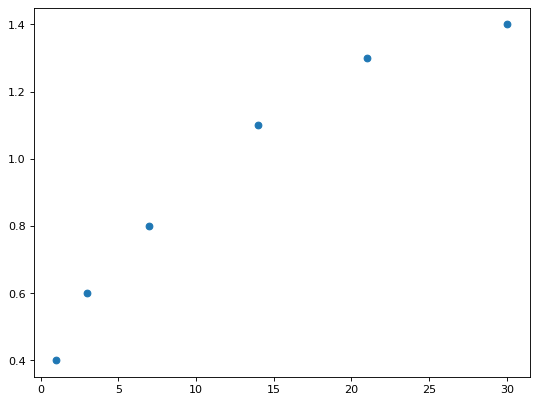

In [24]:
# определяем тип возможной кривой по диаграмме рассеяния
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df['day'], df['cumulative_ARPU'], label="Original Data" )

Обоснуйте выбор одной из аппроксимирующей кривой вида: y = ab^x или y = aln(x) + b.

In [25]:
import matplotlib.pyplot as plt

In [26]:
# задаем аппроксимирующую логарифмияескую функцию
def ln_func(x, a, b):
    return a * np.log10(x) + b

In [27]:
# задаем аппроксимирующую экспоненциальную функцию
def exp_func( x, a, b):
    return a * (b ** x)

In [28]:
# подбираем оптимальные параметры логарифмияеской функции
from scipy.optimize import curve_fit
log_popt, log_pcov = curve_fit(ln_func, df['day'], df['cumulative_ARPU'])

In [29]:
# подбираем оптимальные параметры экспоненциальной функции
exp_popt, exp_pcov = curve_fit(exp_func, df['day'], df['cumulative_ARPU'])

In [30]:
# задаем точку прогноза -  сколько в среднем принесет денег пользователь на 90й день
projection_endpoint = 90

In [31]:
# задаем значения функции x с помощью метода np.arange и параметры подобранной кривой
ln_y_projected = ln_func(np.arange( projection_endpoint ), *log_popt)
exp_y_projected = exp_func(np.arange( projection_endpoint ), *exp_popt)

<ipython-input-26-8485e1b9d377>:3: RuntimeWarning: divide by zero encountered in log10
  return a * np.log10(x) + b


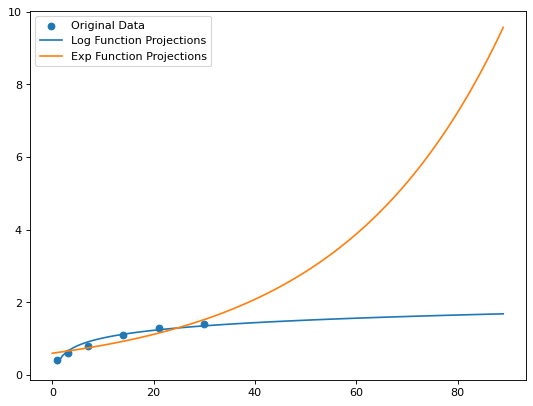

In [32]:
# смотрим график исходных данных и полученных кривых
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df['day'], df['cumulative_ARPU'], label="Original Data" )
plt.plot( ln_y_projected, label="Log Function Projections" )
plt.plot( exp_y_projected, label="Exp Function Projections" )
plt.legend()
plt.show()

In [33]:
# делаем прогноз - сколько в среднем принесет денег пользователь на 90й день
print('Прогноз - сколько в среднем принесет денег пользователь на 90й день по log модели', round(ln_y_projected[89],1))
print('Прогноз - сколько в среднем принесет денег пользователь на 90й день по exp модели', round(exp_y_projected[89],1))

Прогноз - сколько в среднем принесет денег пользователь на 90й день по log модели 1.7
Прогноз - сколько в среднем принесет денег пользователь на 90й день по exp модели 9.6


In [34]:
# отбираем среди прогнозов значения за 1, 3, 7, 14, 21 и 30 дни
y_log_pred = [ln_y_projected[ i ] for i in list(df['day'])]
y_log_pred

[0.3182915349828918,
 0.6525362979654962,
 0.9103204821057709,
 1.1212054480469356,
 1.2445652450883753,
 1.353080991114816]

In [35]:
# отбираем среди прогнозов значения за 1, 3, 7, 14, 21 и 30 дни
y_exp_pred = [exp_y_projected[ i ] for i in list(df['day'])]
y_exp_pred

[0.6193285013669545,
 0.659088716032839,
 0.7464307044090908,
 0.9280456295448732,
 1.153849493904676,
 1.5266933282102846]

In [36]:
actual_values = np.array([0.4, 0.6, 0.8, 1.10, 1.30, 1.40])
predicted_values = np.array([0.3182915349828918, 0.6525362979654962, 0.9103204821057709, 1.1212054480469356, 1.2445652450883753, 1.353080991114816])

# Вычисление среднеквадратической ошибки (MSE)
mse = np.mean((actual_values - predicted_values) ** 2)
mse

0.004555170184195374

In [37]:
actual_values = np.array([0.4, 0.6, 0.8, 1.10, 1.30, 1.40])
predicted_values = np.array([0.6193285013669545, 0.659088716032839, 0.7464307044090908, 0.9280456295448732, 1.153849493904676, 1.5266933282102846])

# Вычисление среднеквадратической ошибки (MSE)
mse = np.mean((actual_values - predicted_values) ** 2)
mse

0.020240935444654523

**Вывод:** логарифмическая функция аппроксимирует исследуемую зависимость с меньшей среднеквадратической ошибкой (0.004555170184195374), поэтому целесообразнее использовать для прогноза только данную функцию. Прогноз - сколько в среднем принесет денег пользователь на 90й день по log модели **1,7**.